<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Projeto_Gerador_Caracteres_Rede_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/bstriner/keras_adversarial.git

fatal: destination path 'keras_adversarial' already exists and is not an empty directory.


In [2]:
!pip install '/content/keras_adversarial'

Processing ./keras_adversarial
  Created wheel for keras-adversarial: filename=keras_adversarial-0.0.3-py2.py3-none-any.whl size=14046 sha256=fb0449a04ba8c2d939313c1ef9f4a3642714f90327975b03b72e3e9bc35c7968
  Stored in directory: /tmp/pip-ephem-wheel-cache-qc809k61/wheels/fa/66/6b/b03143f3173bf0dbb61179b92729fd82f21c9b0ee07b3aefe6
Successfully built keras-adversarial
  Found existing installation: keras-adversarial 0.0.3
    Uninstalling keras-adversarial-0.0.3:
      Successfully uninstalled keras-adversarial-0.0.3


In [3]:
!pip install keras==2.1.1

Biblioteca Keras Adversarial
[link text](https://github.com/bstriner/keras-adversarial)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import keras_adversarial
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Reshape
from keras.regularizers import L1L2
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling

Using TensorFlow backend.


In [5]:
(previsores_treinamento, _), (_, _) = mnist.load_data()
previsores_treinamento.shape

(60000, 28, 28)

In [0]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255 #Normalização da base

In [7]:
#Gerador
gerador = Sequential()
gerador.add(Dense(units = 500, input_dim = 100, activation = 'relu',
                  kernel_regularizer = L1L2(1e-5, 1e-5)))
gerador.add(Dense(units = 500, input_dim = 100, activation = 'relu',
                  kernel_regularizer = L1L2(1e-5, 1e-5)))
gerador.add(Dense(units = 28*28, activation = 'sigmoid', kernel_regularizer = L1L2(1e-5, 1e-5)))
gerador.add(Reshape((28, 28)))




Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
#Discriminador
discriminador = Sequential()
discriminador.add(InputLayer(input_shape = (28, 28)))
discriminador.add(Flatten())
discriminador.add(Dense(units = 500, activation = 'relu', kernel_regularizer = L1L2(1e-5, 1e-5)))
discriminador.add(Dense(units = 500, activation = 'relu', kernel_regularizer = L1L2(1e-5, 1e-5)))
discriminador.add(Dense(units = 1, activation = 'sigmoid', kernel_regularizer = L1L2(1e-5, 1e-5)))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
gan = simple_gan(gerador, discriminador, normal_latent_sampling((100, )))#normal_atent_sampling tem de possuir o mesmo valor do input dim
modelo = AdversarialModel(base_model = gan,
                          player_params = [gerador.trainable_weights,
                                           discriminador.trainable_weights])
modelo.adversarial_compile(adversarial_optimizer = AdversarialOptimizerSimultaneous(),
                           player_optimizers = ['adam', 'adam'],
                           loss = 'binary_crossentropy')




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
modelo.fit(x = previsores_treinamento, y = gan_targets(60000), epochs = 100, batch_size = 256)

Epoch 1/100
60000/60000 [==============================] - 3s 45us/step - loss: 21.2821 - player_0_loss: 20.3188 - player_0_yfake_loss: 6.1806 - player_0_yreal_loss: 13.1886 - player_1_loss: 0.9634 - player_1_yfake_loss: 0.0057 - player_1_yreal_loss: 0.0081
Epoch 2/100
60000/60000 [==============================] - 3s 46us/step - loss: 20.9920 - player_0_loss: 20.0252 - player_0_yfake_loss: 6.0974 - player_0_yreal_loss: 12.9751 - player_1_loss: 0.9668 - player_1_yfake_loss: 0.0059 - player_1_yreal_loss: 0.0082
Epoch 3/100
60000/60000 [==============================] - 3s 45us/step - loss: 21.5466 - player_0_loss: 20.6084 - player_0_yfake_loss: 6.3261 - player_0_yreal_loss: 13.3568 - player_1_loss: 0.9382 - player_1_yfake_loss: 0.0055 - player_1_yreal_loss: 0.0073
Epoch 4/100
60000/60000 [==============================] - 3s 46us/step - loss: 21.9249 - player_0_loss: 20.9993 - player_0_yfake_loss: 6.6741 - player_0_yreal_loss: 13.4133 - player_1_loss: 0.9256 - player_1_yfake_loss: 0.005

In [0]:
amostras = np.random.normal(size = (10, 100))#10 amostras de imagens com 100 atributos pois a entrada da rede neural e 100
previsao = gerador.predict(amostras)#o unico valor que precisa salvar na rede neural é o gerador pois com apenas ele já é possivel criar imagens

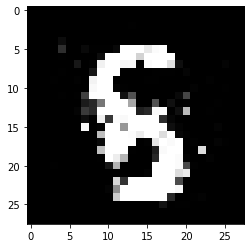

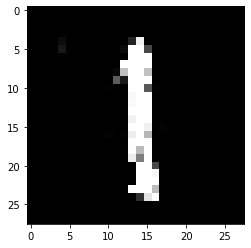

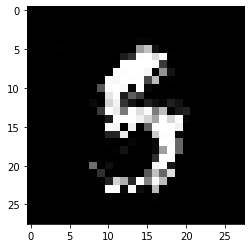

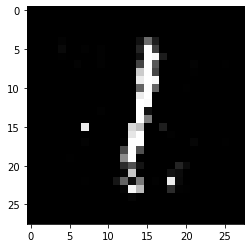

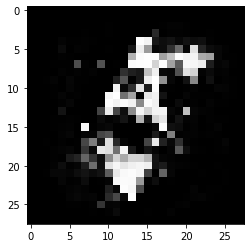

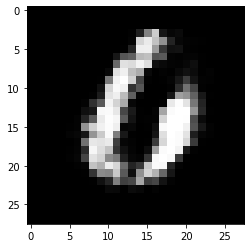

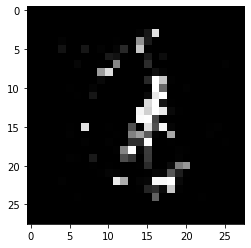

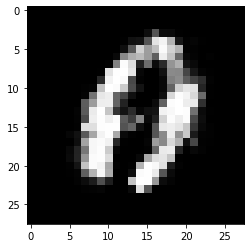

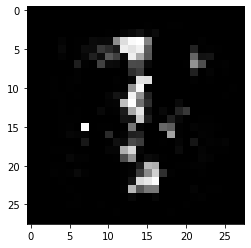

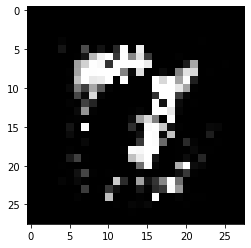

In [18]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :], cmap = 'gray')#cmap deixa a imagem em uma unica cor
  plt.show()